In [37]:
import matplotlib.pyplot as plt
import xlwings as xw
import pandas as pd
import numpy as np

plt.style.use('ggplot') 
wb = xw.Book('test.xlsm')
sheet = wb.sheets['Sheet1']



# Large Dataset example 

In [192]:
# Number of rows
n_rows = 10_000_000

# Generate data
dates = pd.date_range(start='2023-01-01', periods=n_rows, freq='T')  # One-minute intervals
regions = np.random.choice(['North', 'South', 'East', 'West'], size=n_rows)
products = np.random.choice(['Product A', 'Product B', 'Product C'], size=n_rows)
sales = np.random.randint(50, 1000, size=n_rows)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Region': regions,
    'Product': products,
    'Sales': sales
})

print(f"Data Rows: {df.shape[0]}, Data Columns: {df.shape[1]}")
df.head()

Data Rows: 10000000, Data Columns: 4


Date Region    Product  Sales
0 2023-01-01 00:00:00   East  Product B    761
1 2023-01-01 00:01:00   West  Product A    554
2 2023-01-01 00:02:00   West  Product B    492
3 2023-01-01 00:03:00   West  Product A    766
4 2023-01-01 00:04:00   West  Product C    302

## Create pivot using Pandas object

In [178]:
def mean_sales_above_threshold(series, threshold=300):
    filtered_sales = series[series > threshold]
    if filtered_sales.empty:
        return np.nan
    else:
        return filtered_sales.mean()

# Create pivot table with custom aggregation
pivot_table = pd.pivot_table(
    df, 
    values='Sales', 
    index=['Region'], 
    columns=['Product'], 
    aggfunc=lambda x: mean_sales_above_threshold(x, 300)  # Using the custom function
)
print("data size" , df.shape)
pivot_table

data size (10000000, 4)


Product   Product A   Product B   Product C
Region                                     
East     650.164443  649.905631  649.907648
North    650.103154  649.930832  649.675764
South    650.080376  650.247609  650.161042
West     650.044229  650.641918  649.825633

##  Clear all objects

In [190]:
 
sheet.clear()
for shape in sheet.shapes:
    shape.delete()

## Write pivot output

In [182]:
sheet.range("A1").value = pivot_table

## Plot in excel from Python

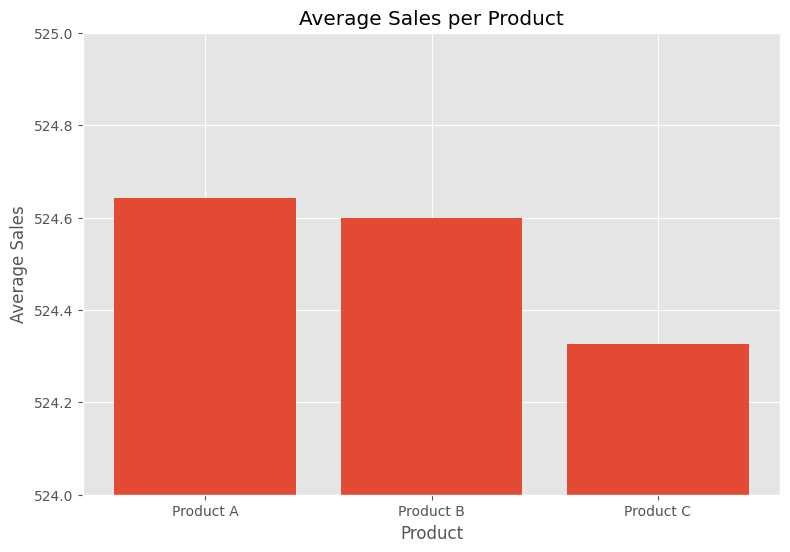

In [187]:
grouped =  df.groupby('Product')['Sales'].mean().reset_index()

 
fig = plt.figure(figsize=(9, 6))
plt.bar(grouped['Product'], grouped['Sales'])

plt.ylim([524,525])
# Set the labels and title
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.title('Average Sales per Product')

plt.savefig('graph.png')  # Save the graph as an image file

# Create a new workbook or connect to an existing workbook
 

# Add the graph to Excel
sheet.pictures.add('graph.png', name='MyPlot', update=True, left=sheet.range('H1').left, top=sheet.range('H1').top)

plt.show()

## Create Excel a chart

In [188]:
if len(sheet.charts):
    sheet.charts[0].delete()

In [189]:
chart = sheet.charts.add(left=sheet.range('A7').left, top= sheet.range('A7').top)
chart.set_source_data(sheet.range('A1:D5'))
chart.chart_type = 'line'
sheet.charts

Charts([<Chart 'Chart 91' in <Sheet [test.xlsm]Sheet1>>])

# Formula

In [172]:
sheet.range('E2').formula = '=SUM(A2:D2)'
sheet.range('E3').formula = '=SUM(A3:D3)'
sheet.range('E4').formula = '=SUM(A4:D4)'
sheet.range('E5').formula = '=SUM(A5:D5)'

# select range

In [171]:
sheet.range('A1').expand()

<Range [test.xlsm]Sheet1!$A$1:$D$5>